In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Part 1 - Preparing the Data

In [2]:
# fake sample data for sake of lesson
df = pd.read_csv("data/fake_reg.csv")

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


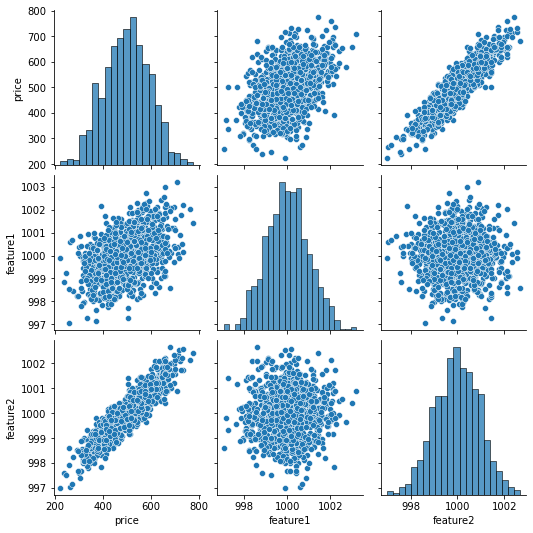

In [5]:
sns.pairplot(df);

In [10]:
# .values converts it to numpy aray, AKA matrix. Neural networks cannot use Series
X = df[["feature1", "feature2"]].values
y = df["price"].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# Part 2 - Creating and Training the Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# model creation method 1
# model = Sequential([Dense(4, activation="relu"),
#                     Dense(2, activation="relu"),
#                     Dense(1)])

In [21]:
# model creation method 2 - PREFERRED
model = Sequential()

model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop", loss="mse")

In [22]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 4ms/step - loss: 255030.6923
Epoch 2/250
22/22 [==============================] - 0s 4ms/step - loss: 260853.0740
Epoch 3/250
22/22 [==============================] - 0s 4ms/step - loss: 260814.1929
Epoch 4/250
22/22 [==============================] - 0s 4ms/step - loss: 259534.4844
Epoch 5/250
22/22 [==============================] - 0s 4ms/step - loss: 257011.9966
Epoch 6/250
22/22 [==============================] - 0s 4ms/step - loss: 253233.1189
Epoch 7/250
22/22 [==============================] - 0s 4ms/step - loss: 257965.1420
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 252907.4769
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 257077.2344
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 254935.0115
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 257500.3295
Epoch 12/250
22/22 [==============================] - 0s 4ms/st

22/22 [==============================] - 0s 4ms/step - loss: 1476.0888
Epoch 97/250
22/22 [==============================] - 0s 3ms/step - loss: 1427.2990
Epoch 98/250
22/22 [==============================] - 0s 4ms/step - loss: 1317.9834
Epoch 99/250
22/22 [==============================] - 0s 3ms/step - loss: 1306.4378
Epoch 100/250
22/22 [==============================] - 0s 4ms/step - loss: 1346.9980
Epoch 101/250
22/22 [==============================] - 0s 4ms/step - loss: 1298.1541
Epoch 102/250
22/22 [==============================] - 0s 4ms/step - loss: 1245.1267
Epoch 103/250
22/22 [==============================] - 0s 3ms/step - loss: 1282.8482
Epoch 104/250
22/22 [==============================] - 0s 4ms/step - loss: 1300.2903
Epoch 105/250
22/22 [==============================] - 0s 4ms/step - loss: 1172.3976
Epoch 106/250
22/22 [==============================] - 0s 4ms/step - loss: 1176.3864
Epoch 107/250
22/22 [==============================] - 0s 4ms/step - loss: 1233.84

22/22 [==============================] - 0s 4ms/step - loss: 37.4135
Epoch 194/250
22/22 [==============================] - 0s 3ms/step - loss: 37.3362
Epoch 195/250
22/22 [==============================] - 0s 4ms/step - loss: 34.9058
Epoch 196/250
22/22 [==============================] - 0s 3ms/step - loss: 31.4836
Epoch 197/250
22/22 [==============================] - 0s 3ms/step - loss: 29.4018
Epoch 198/250
22/22 [==============================] - 0s 3ms/step - loss: 29.4293
Epoch 199/250
22/22 [==============================] - 0s 3ms/step - loss: 26.3030
Epoch 200/250
22/22 [==============================] - 0s 4ms/step - loss: 27.9624
Epoch 201/250
22/22 [==============================] - 0s 4ms/step - loss: 28.6711
Epoch 202/250
22/22 [==============================] - 0s 3ms/step - loss: 28.3806
Epoch 203/250
22/22 [==============================] - 0s 3ms/step - loss: 26.7617
Epoch 204/250
22/22 [==============================] - 0s 3ms/step - loss: 26.3465
Epoch 205/250
22/2

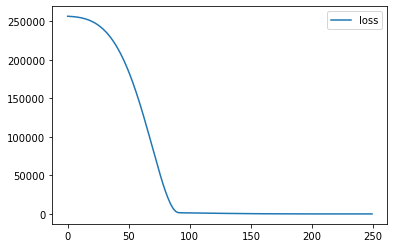

In [27]:
pd.DataFrame(model.history.history).plot();

# Part 3 - Model Evaluation

In [28]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 25.1261


25.126148223876953

In [29]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 1ms/step - loss: 23.7286


23.72862434387207

In [35]:
preds = model.predict(X_test)

In [36]:
preds = pd.Series(preds.reshape(300,))
pred_df = pd.DataFrame(y_test, columns=["Test True Y"])
pred_df = pd.concat([pred_df, preds], axis=1)

In [38]:
pred_df.columns = ["Test True Y", "Predictions"]
pred_df

,Test True Y,Predictions
0,402.296319,405.517731
1,624.156198,623.943726
2,582.455066,592.507812
3,578.588606,572.595032
4,371.224104,366.825104
...,...,...
295,525.704657,529.378052
296,502.909473,515.667419
297,612.727910,610.043152
298,417.569725,417.186981


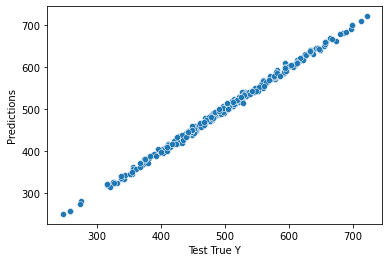

In [41]:
sns.scatterplot(data=pred_df, x="Test True Y", y = "Predictions");

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
mean_absolute_error(pred_df["Test True Y"], pred_df["Predictions"])

4.020849258234103

In [44]:
# mean absolute error describes how off we are, in this case we are 4$ off the price on average
# we can see by describing the data that this is almost nothing because the mean of price is 500$
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [45]:
# same as model.evaluate because the model was calculating MSE
mean_squared_error(pred_df["Test True Y"], pred_df["Predictions"])

25.126150005790187

In [47]:
# root mean squared error
np.sqrt(mean_squared_error(pred_df["Test True Y"], pred_df["Predictions"]))

5.012599126779458

In [48]:
# how to predict on totally new data
new_gem = [[998, 1000]]

In [49]:
new_gem = scaler.transform(new_gem)

In [50]:
model.predict(new_gem)

array([[419.93723]], dtype=float32)

In [51]:
# if we want to save the trained model (especially if big)
from tensorflow.keras.models import load_model

model.save("my_gem_model.h5")

In [52]:
# to load the model
later_model = load_model("my_gem_model.h5")